In [2]:
%cd "C:\Users\hrish\George Mason University - O365 Production\DAEN 690 - Group Only-GRP - 063022"

C:\Users\hrish\George Mason University - O365 Production\DAEN 690 - Group Only-GRP - 063022


In [3]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from os import listdir
from keras.preprocessing import sequence

In [4]:
first_file = pd.read_csv('SimData_2022.06.30_10.27.04.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

second_file = pd.read_csv('SimData_2022.06.30_13.01.46.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

third_file = pd.read_csv('SimData_2022.06.30_13.05.32.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

fourth_file = pd.read_csv('SimData_2022.06.30_13.42.04.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

fifth_file = pd.read_csv('SimData_2022.07.07_09.56.57.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

# adding this file to balance hover or not
sixth_file = pd.read_csv('SimData_2022.07.07_14.32.46.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

df = pd.concat([first_file, second_file, third_file, fourth_file,fifth_file, sixth_file])

In [5]:
df.head(10)
df['turnDirection'] = df['trueHeading'].rolling(window = 5).apply(lambda x: x[-1]-x[0], raw=True)
df['Altdiff'] = df['absoluteAltitude'].rolling(window = 5).apply(lambda x: x[0]- x[-1], raw = True)
df['groundSpeedDiff'] = df['groundSpeed'].rolling(window = 5).apply(lambda x: x[0]- x[-1], raw = True)
df['turnDirection']  = df['turnDirection'].fillna(0)
df['Altdiff'] = df['Altdiff'].fillna(0)
df['groundSpeedDiff']=df['groundSpeedDiff'].fillna(0)
df.head(10)


,datetime,_id,latitude,longitude,gpsAltitude,absoluteAltitude,magneticHeading,trueHeading,pitch,roll,...,hasTransmissionChipCaution,hasTransmissionOilTemperatureWarning,hasTransmissionOilPressureWarning,timestamp,gpsDateTime,seconds,vil,turnDirection,Altdiff,groundSpeedDiff
0,2022-06-30 14:27:53.216,::1656613673.216,20.904799,-156.424679,36.82,0.12,204.071,213.554,1.594,0.665,...,False,False,False,2022-06-30T14:27:53.216Z,2022-06-30T14:27:53.216Z,1.656614e+09,-2,0.000,0.0,0.000000
1,2022-06-30 14:27:53.234,::1656613673.234,20.904799,-156.424679,36.82,0.12,204.064,213.547,1.593,0.683,...,False,False,False,2022-06-30T14:27:53.234Z,2022-06-30T14:27:53.234Z,1.656614e+09,-2,0.000,0.0,0.000000
2,2022-06-30 14:27:53.251,::1656613673.251,20.904799,-156.424679,36.82,0.12,204.058,213.541,1.593,0.707,...,False,False,False,2022-06-30T14:27:53.251Z,2022-06-30T14:27:53.251Z,1.656614e+09,-2,0.000,0.0,0.000000
3,2022-06-30 14:27:53.271,::1656613673.271,20.904799,-156.424679,36.81,0.12,204.051,213.534,1.594,0.735,...,False,False,False,2022-06-30T14:27:53.271Z,2022-06-30T14:27:53.271Z,1.656614e+09,-2,0.000,0.0,0.000000
4,2022-06-30 14:27:53.293,::1656613673.293,20.904799,-156.424679,36.81,0.12,204.043,213.526,1.596,0.770,...,False,False,False,2022-06-30T14:27:53.293Z,2022-06-30T14:27:53.293Z,1.656614e+09,-2,-0.028,0.0,-0.030217
5,2022-06-30 14:27:53.313,::1656613673.313,20.904799,-156.424679,36.81,0.12,204.035,213.518,1.600,0.807,...,False,False,False,2022-06-30T14:27:53.313Z,2022-06-30T14:27:53.313Z,1.656614e+09,-2,-0.029,0.0,-0.036142
6,2022-06-30 14:27:53.334,::1656613673.334,20.904799,-156.424679,36.81,0.12,204.029,213.512,1.605,0.838,...,False,False,False,2022-06-30T14:27:53.334Z,2022-06-30T14:27:53.334Z,1.656614e+09,-2,-0.029,0.0,-0.030809
7,2022-06-30 14:27:53.356,::1656613673.356,20.904799,-156.424679,36.82,0.12,204.023,213.506,1.612,0.868,...,False,False,False,2022-06-30T14:27:53.356Z,2022-06-30T14:27:53.356Z,1.656614e+09,-2,-0.028,0.0,-0.020737
8,2022-06-30 14:27:53.376,::1656613673.376,20.904799,-156.424679,36.82,0.12,204.017,213.499,1.622,0.893,...,False,False,False,2022-06-30T14:27:53.376Z,2022-06-30T14:27:53.376Z,1.656614e+09,-2,-0.027,0.0,-0.007110
9,2022-06-30 14:27:53.393,::1656613673.393,20.904799,-156.424679,36.82,0.12,204.012,213.495,1.633,0.909,...,False,False,False,2022-06-30T14:27:53.393Z,2022-06-30T14:27:53.393Z,1.656614e+09,-2,-0.023,0.0,0.004147


In [6]:
df2 = df[['datetime',
          'latitude',
          'longitude', 
          'absoluteAltitude', 
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed', 
          'climbOrDescentRate', 
          'hasWeightOnWheels', 
          'turnRate to degPerSec', 
          'cyclicPositionPitch', 
          'cyclicPositionRoll', 
          'collectivePosition', 
          'antiTorquePedalPosition', 
          'throttlePosition', 
          'e1Torque', 
          'e2Torque',
          'turnDirection',
          'Altdiff',
          'groundSpeedDiff'
          
]] # only capture columns that relevant into another dataframe

# Convert timestamp into year month day and hour in seconds 
# eliminate the milliseonds part in order to group them by seconds with an average
df2['datetime'] = df2.datetime.dt.strftime('%Y-%m-%d %H:%M:%S.%f').astype('datetime64[ns]')


# Group all row by seconds with a average all the datapoint into another dataframe
df3 = df2.groupby(by=["datetime"], dropna=False).mean().reset_index()

C:\Users\hrish\AppData\Local\Temp\ipykernel_18900\4229051035.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['datetime'] = df2.datetime.dt.strftime('%Y-%m-%d %H:%M:%S.%f').astype('datetime64[ns]')


In [7]:
df3['HoverOrNot'] = 0

df3.loc[(df3['datetime'].between('2022-06-30 14:28:13' , '2022-06-30 14:33:12' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:34:10' , '2022-06-30 14:38:29' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:40:10' , '2022-06-30 14:43:40' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:46:00' , '2022-06-30 14:55:55' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:57:10' , '2022-06-30 15:00:16' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:01:20' , '2022-06-30 15:07:03' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:07:38' , '2022-06-30 15:10:38' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:12:02' , '2022-06-30 15:18:30' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:20:18' , '2022-06-30 15:23:52' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:25:30' , '2022-06-30 15:30:17' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:36:45' , '2022-06-30 15:40:24' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:42:28' , '2022-06-30 15:55:20' , inclusive='both')),['HoverOrNot']] = 1


# Combine with the new data

df3.loc[(df3['datetime'].between('2022-07-07 13:58:38' , '2022-07-07 14:02:54' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:03:40' , '2022-07-07 14:11:19' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:14:55' , '2022-07-07 14:21:03' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:22:19' , '2022-07-07 14:23:18' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:24:20' , '2022-07-07 14:35:00' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:36:00' , '2022-07-07 14:45:24' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:46:50' , '2022-07-07 14:47:20' , inclusive='both')),['HoverOrNot']] = 1

# Double check to see hasWeightOnWheels = 1, then set Hover Or Not = 0
df3.loc[(df3['hasWeightOnWheels'] == 1), ['HoverOrNot']] = 0
df5=df3
df5.head(5)

,datetime,latitude,longitude,absoluteAltitude,trueHeading,groundSpeed,trueAirspeed,climbOrDescentRate,hasWeightOnWheels,turnRate to degPerSec,...,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,turnDirection,Altdiff,groundSpeedDiff,HoverOrNot
0,2022-06-30 14:27:53.216,20.904799,-156.424679,0.12,213.554,0.008887,0.024884,0.122,0.0,-0.204,...,39.330,3.465,12.395,0.0,-4.350,-4.350,0.000,0.0,0.000000,0
1,2022-06-30 14:27:53.234,20.904799,-156.424679,0.12,213.547,0.010072,0.030809,0.115,0.0,-0.201,...,37.337,3.465,12.395,0.0,-4.347,-4.347,0.000,0.0,0.000000,0
2,2022-06-30 14:27:53.251,20.904799,-156.424679,0.12,213.541,0.018959,0.041474,0.105,0.0,-0.197,...,35.317,3.465,12.395,0.0,-4.342,-4.342,0.000,0.0,0.000000,0
3,2022-06-30 14:27:53.271,20.904799,-156.424679,0.12,213.534,0.029032,0.053916,0.092,0.0,-0.192,...,33.689,3.465,12.395,0.0,-4.335,-4.335,0.000,0.0,0.000000,0
4,2022-06-30 14:27:53.293,20.904799,-156.424679,0.12,213.526,0.039104,0.066951,0.075,0.0,-0.186,...,32.547,3.465,12.395,0.0,-4.326,-4.326,-0.028,0.0,-0.030217,0


In [8]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

feature_names = [
          'absoluteAltitude', 
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed', 
          'climbOrDescentRate', 
          'turnRate to degPerSec', 
          'cyclicPositionPitch', 
          'cyclicPositionRoll', 
          'collectivePosition', 
          'antiTorquePedalPosition', 
          'throttlePosition', 
          'e1Torque', 
          'e2Torque',
          'turnDirection',
          'Altdiff',
          'groundSpeedDiff',
        'HoverOrNot']               
                
                
x = df5[feature_names]
y = df5['HoverOrNot']
len(feature_names)

#https://www.analyticsvidhya.com/blog/2019/01/introduction-time-series-classification/?
#https://www.cis.fordham.edu/wisdm/dataset.php
#https://towardsdatascience.com/time-series-classification-for-human-activity-recognition-with-lstms-using-tensorflow-2-and-keras-b816431afdff

17

In [9]:
# convert dataframe to multiple arrays

def df_to_arr_by_sequence(df_input):
    check_hover=0
    previous=0
    rotorcraft_np_arr_main=[]
    rotorcraft_np_arr_target=[]
    for i in range(len(df_input)):
        if(df_input.loc[i,"HoverOrNot"]!=check_hover):
            data = df_input.iloc[previous:i]
            data = data.drop(columns=['HoverOrNot'])
            rotorcraft_np_arr_main.append(data)
            #rotorcraft_np_arr_target.append([check_hover] * (i-previous))
            rotorcraft_np_arr_target.append(check_hover)
            #print("hover before ", check_hover)
            check_hover=1 if check_hover == 0 else 0
            #print("hover after ", check_hover)
            previous=i
    return rotorcraft_np_arr_main,rotorcraft_np_arr_target

x_main,x_target = df_to_arr_by_sequence(x)
            


            
                                
        

In [10]:
x_main = np.asarray(x_main, dtype=object)
x_target = np.asarray(x_target, dtype=np.float32)
print(x_main.size, " ", x_target.size)
pd.Series(x_main).describe()
x_target[0]

46   46


0.0

In [95]:
from keras_preprocessing.sequence import pad_sequences
#X=pad_sequences(X, maxlen=len(feature_names), padding='post', dtype='float', truncating='post')
seq_len = 700
final_seq=pad_sequences(x_main, maxlen=seq_len, padding='post', dtype='float', truncating='post')
model = Sequential()
model.add(LSTM(256, input_shape=(seq_len, len(feature_names)-1)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               279552    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 279,809
Trainable params: 279,809
Non-trainable params: 0
_________________________________________________________________


In [96]:
type(final_seq)
X_train = final_seq[np.r_[0:int(len(final_seq)*0.8)],:]
X_test = x_target[np.r_[0:int(len(x_target)*0.8)]]
print(len(X_train)-1)
Y_train = final_seq[np.r_[int(len(final_seq)*0.8):(len(final_seq))],:]
Y_test = x_target[np.r_[int(len(x_target)*0.8):(len(x_target))]]
print(len(final_seq))
print(len(X_train)," ",len(Y_train))
print(len(X_test)," ",len(Y_test))
#np.ndarray[0 : len(x_target)*0.8, : ]
print(Y_train.shape)

35
46
36   10
36   10
(10, 700, 16)


In [97]:

adam = Adam(lr=0.001)
chk = ModelCheckpoint('best_model.pkl', monitor='val_acc', save_best_only=True, mode='max', verbose=1)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
rotorcraft_acc = model.fit(X_train, X_test, epochs=20, batch_size=128, callbacks=[chk], validation_data=(Y_train,Y_test))


Epoch 1/20


C:\Users\hrish\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 9s 9s/step - loss: 0.6570 - accuracy: 0.5000 - val_loss: 0.6868 - val_accuracy: 0.6000
Epoch 2/20
1/1 [==============================] - 4s 4s/step - loss: 0.5357 - accuracy: 0.7222 - val_loss: 0.6674 - val_accuracy: 0.6000
Epoch 3/20
1/1 [==============================] - 4s 4s/step - loss: 0.4593 - accuracy: 0.8611 - val_loss: 0.6593 - val_accuracy: 0.7000
Epoch 4/20
1/1 [==============================] - 4s 4s/step - loss: 0.4026 - accuracy: 0.8611 - val_loss: 0.6134 - val_accuracy: 0.7000
Epoch 5/20
1/1 [==============================] - 4s 4s/step - loss: 0.3647 - accuracy: 0.8889 - val_loss: 0.5853 - val_accuracy: 0.8000
Epoch 6/20
1/1 [==============================] - 4s 4s/step - loss: 0.3315 - accuracy: 0.9444 - val_loss: 0.5678 - val_accuracy: 0.8000
Epoch 7/20
1/1 [==============================] - 4s 4s/step - loss: 0.3048 - accuracy: 0.9167 - val_loss: 0.5338 - val_accuracy: 0.8000
Epoch 8/20
1/1 [==============================] - 4s

In [98]:
#model = load_model('best_model.pkl')

from sklearn.metrics import accuracy_score
test_preds = (model.predict(Y_train) > 0.5).astype("int32")
accuracy_score(Y_test, test_preds)

1/1 [==============================] - 1s 1s/step


0.7

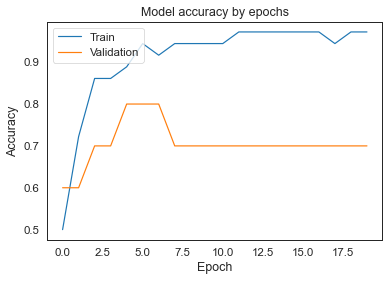

In [99]:
plt.plot(rotorcraft_acc.history['accuracy'])
plt.plot(rotorcraft_acc.history['val_accuracy'])
plt.title('Model accuracy by epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [107]:
validation_file1 = pd.read_csv('SimData_2022.07.14_09.37.45.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

validation_file2 = pd.read_csv('SimData_2022.07.14_10.14.53.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

validation_file3 = pd.read_csv('SimData_2022.07.14_10.24.57.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)


validation_file = pd.concat([validation_file1,
                             validation_file2,
                             validation_file3]).reset_index()

validation_file['datetime'] = validation_file.datetime.dt.strftime('%Y-%m-%d %H:%M:%S.%f').astype('datetime64[ns]')


# Group all row by seconds with a average all the datapoint into another dataframe
validation_file = validation_file.groupby(by=["datetime"], dropna=False).mean().reset_index()


validation_file['HoverOrNot'] = 0


validation_file.loc[(validation_file['datetime'].between('2022-07-14 13:42:02' , '2022-07-14 13:48:53' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-07-14 13:49:06' , '2022-07-14 13:54:33' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-07-14 13:55:38' , '2022-07-14 13:56:35' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-07-14 13:58:00' , '2022-07-14 14:00:17' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-07-14 14:02:30' , '2022-07-14 14:04:58' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-07-14 14:15:30' , '2022-07-14 14:18:50' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-07-14 14:25:55' , '2022-07-14 14:28:14' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-07-14 14:29:52' , '2022-07-14 14:31:46' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-07-14 14:33:40' , '2022-07-14 14:37:43' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-07-14 14:39:36' , '2022-07-14 14:46:14' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-07-14 14:46:26' , '2022-07-14 15:01:00' , inclusive='both')),['HoverOrNot']] = 1

validation_file['turnDirection'] = validation_file['trueHeading'].rolling(window = 5).apply(lambda x: x[-1]-x[0], raw=True)
validation_file['Altdiff'] = validation_file['absoluteAltitude'].rolling(window = 5).apply(lambda x: x[0]- x[-1], raw = True)
validation_file['groundSpeedDiff'] = validation_file['groundSpeed'].rolling(window = 5).apply(lambda x: x[0]- x[-1], raw = True)
validation_file['turnDirection']  = validation_file['turnDirection'].fillna(0)
validation_file['Altdiff'] = validation_file['Altdiff'].fillna(0)
validation_file['groundSpeedDiff']=validation_file['groundSpeedDiff'].fillna(0)

validation_data = validation_file[feature_names]
validation_classification = validation_file['HoverOrNot']
val_data_raw,val_target_raw = df_to_arr_by_sequence(validation_data)
val_data = np.asarray(val_data_raw, dtype=object)
val_target = np.asarray(val_target_raw, dtype=np.float32)

In [110]:
val_data[0]

,absoluteAltitude,trueHeading,groundSpeed,trueAirspeed,climbOrDescentRate,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,turnDirection,Altdiff,groundSpeedDiff
0,0.02,43.917,0.069321,0.290317,0.074,-0.001,-123.824,9.960,3.530,33.513,0.000,-2.593,-2.593,0.000,0.00,0.000000
1,0.03,43.961,0.084725,0.215072,0.200,-0.002,-118.951,11.529,3.528,33.513,0.000,-3.776,-3.776,0.000,0.00,0.000000
2,0.03,43.988,0.087688,0.168265,0.286,-0.002,-116.050,11.182,3.528,33.513,0.000,-4.338,-4.338,0.000,0.00,0.000000
3,0.03,44.019,0.087688,0.148713,0.394,-0.001,-112.920,10.041,3.528,33.513,0.000,-4.780,-4.780,0.000,0.00,0.000000
4,0.03,44.052,0.087095,0.171820,0.497,0.003,-109.449,8.111,3.528,33.513,0.000,-5.221,-5.221,0.135,-0.01,-0.017775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4151,0.50,35.067,0.158786,0.278467,7.258,-0.057,14.523,4.367,13.160,-6.600,43.112,33.802,33.802,-0.059,-0.03,-0.013627
4152,0.50,35.050,0.162341,0.285577,7.404,-0.061,9.561,2.159,13.700,-6.395,42.972,33.629,33.629,-0.065,-0.02,-0.007110
4153,0.50,35.032,0.163526,0.288540,7.535,-0.065,9.285,2.154,13.700,-6.395,42.841,33.443,33.443,-0.070,-0.01,-0.001185
4154,0.51,35.016,0.162933,0.289132,7.642,-0.070,9.235,2.797,13.700,-6.395,42.727,33.267,33.267,-0.071,-0.02,-0.002962


In [102]:
from sklearn.metrics import accuracy_score
val_data=pad_sequences(val_data, maxlen=seq_len, padding='post', dtype='float', truncating='post')
val_preds = (model.predict(val_data) > 0.5).astype("int32")
accuracy_score(val_target, val_preds)

1/1 [==============================] - 0s 457ms/step


0.8181818181818182

In [103]:
val_preds.size

22

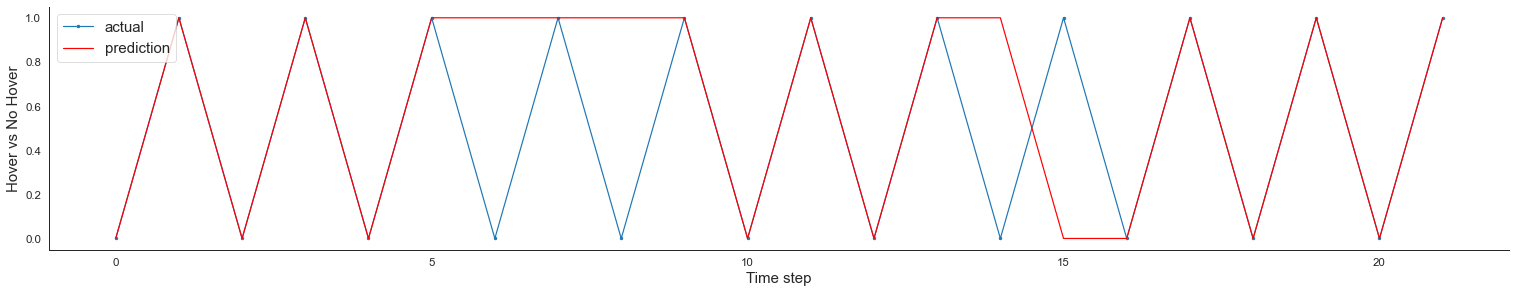

In [104]:
Y_test_viz = val_target.astype("int32")
test_preds_viz = val_preds.flatten()

import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
aa=[x for x in range(22)]
plt.figure(figsize=(22,4))
plt.plot(aa, Y_test_viz, marker='.', label="actual")
plt.plot(aa, test_preds_viz, 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Hover vs No Hover', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

In [111]:
val_data_raw[1]

,absoluteAltitude,trueHeading,groundSpeed,trueAirspeed,climbOrDescentRate,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,turnDirection,Altdiff,groundSpeedDiff
4156,0.52,34.975,0.171228,0.338308,7.892,-0.083,-0.478,-1.796,15.163,-5.751,42.473,32.876,32.876,-0.075,-0.02,-0.008887
4157,0.53,34.955,0.178338,0.355490,8.022,-0.090,-3.356,-3.287,15.694,-5.312,42.346,32.660,32.660,-0.077,-0.03,-0.014812
4158,0.53,34.934,0.183078,0.355490,8.165,-0.098,-4.958,-1.918,16.075,-4.872,42.225,32.468,32.468,-0.082,-0.02,-0.020144
4159,0.54,34.912,0.193742,0.359638,8.329,-0.108,-8.879,-3.293,16.915,-4.872,42.096,32.254,32.254,-0.085,-0.03,-0.027847
4160,0.55,34.890,0.202037,0.357860,8.488,-0.116,-7.901,-3.166,16.915,-4.067,41.970,32.003,32.003,-0.085,-0.03,-0.030809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20849,0.07,214.226,0.010665,0.018367,-1.949,-0.340,19.306,2.056,3.425,-13.878,46.628,37.492,37.492,-0.054,0.00,0.000000
20850,0.07,214.213,0.011257,0.019552,-1.881,-0.341,19.455,1.944,3.425,-13.878,46.672,37.614,37.614,-0.054,0.00,-0.002370
20851,0.07,214.200,0.011850,0.019552,-1.810,-0.341,19.608,1.915,3.425,-13.878,46.719,37.738,37.738,-0.052,0.00,-0.002962
20852,0.07,214.188,0.011257,0.018959,-1.742,-0.341,19.756,1.973,3.425,-13.878,46.763,37.873,37.873,-0.050,0.00,-0.001185


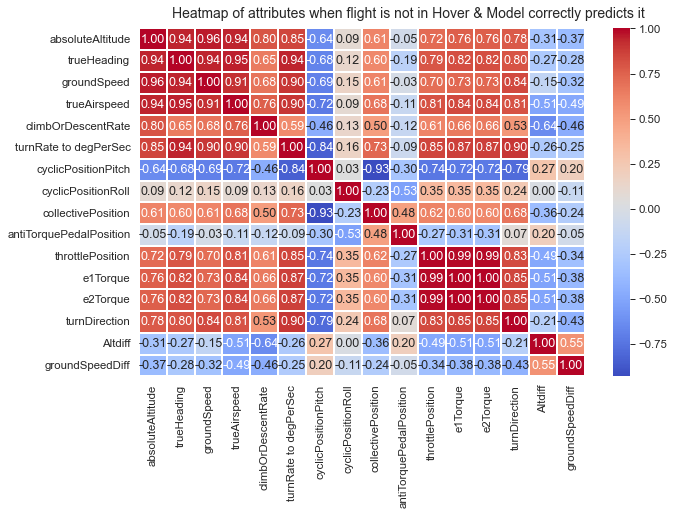

In [132]:
f, ax = plt.subplots(figsize=(10, 6))
corr = val_data_raw[2].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Heatmap of attributes when flight is not in Hover & Model correctly predicts it', fontsize=14)

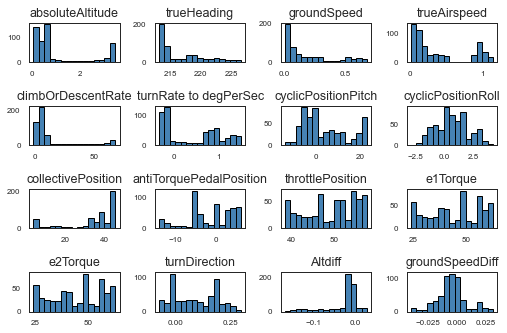

In [129]:
val_data_raw[2].hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

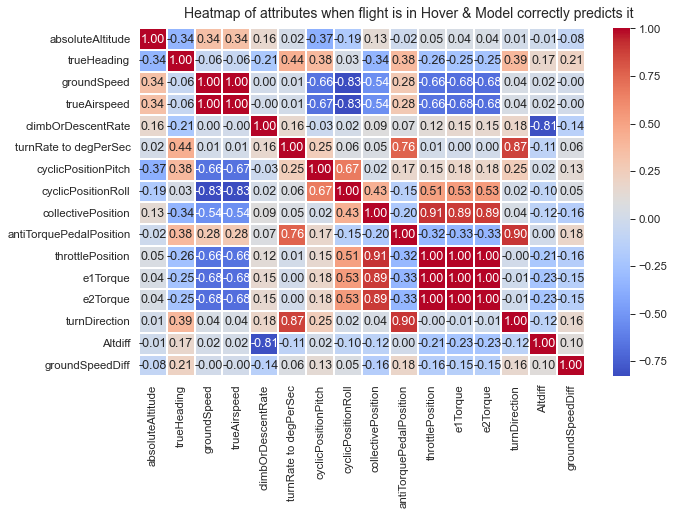

In [125]:
f, ax = plt.subplots(figsize=(10, 6))
corr = val_data_raw[1].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Heatmap of attributes when flight is in Hover & Model correctly predicts it', fontsize=14)

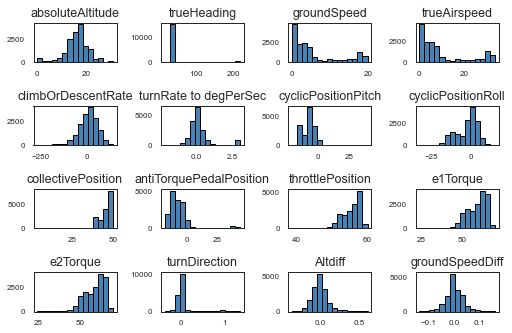

In [133]:
val_data_raw[1].hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   